In [1]:
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt

from Visualisation import render_plot_with_hist, render_averages_plot


/usr/lib/python3/dist-packages/ipywidgets/widgets/widget_link.py:19: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`) Passing types is deprecated in traitlets 4.1.
  super(WidgetTraitTuple, self).__init__(Instance(Widget), Unicode, **kwargs)


In [2]:
# takes environment and episodes, returns reward per episode and the amount of times a goal 
# was achieved
def random_search(env, episodes):
    reward_list = []
    goal_achieved = 0
    
    for _ in range(episodes):
    
        state = env.reset()
        done = False
        total = 0

        while not done:
            action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)
            
            
            # env.render()
            total += reward

            if done:
                break

        reward_list.append(total)
        if total >= 200:
            goal_achieved += 1
    return reward_list, goal_achieved


In [3]:
# produces a graph of performance per episode over `runs` amount of runs

def averages(runs, env, episodes):
    all_rewards = []
    successes = []

    for _ in range(runs):
        rewards, goals = random_search(env, episodes)
        all_rewards.append(rewards)
        successes.append(goals)

    
    rewards_array = np.array([np.array(i) for i in all_rewards])
    return successes, rewards_array

In [4]:
env = gym.make("CartPole-v1")
episodes = 150

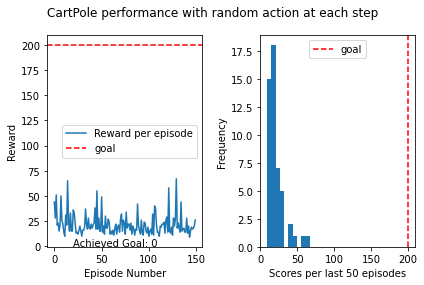

In [10]:
reward, count = random_search(env, episodes)
render_plot_with_hist(episodes, reward, count, "CartPole performance with random action at each step", False, "RandomCPHist")


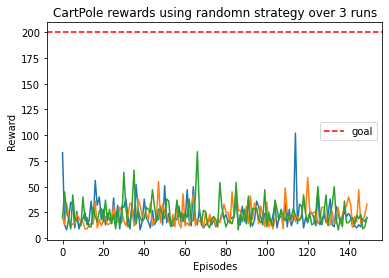

In [6]:
runs = 3
goals, rewards = averages(runs, env, episodes)
render_averages_plot(range(episodes), rewards, "CartPole rewards using randomn strategy over " + str(runs) + " runs", "CP10runs")
